<a href="https://colab.research.google.com/github/alitaspaul/DSP-LAB/blob/master/Experiment5_DSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPERIMENT-5

---



**Discrete Fourier Transform**

---


DATE: 11/09/2023

---



AIM:

Write a program to find DFT of any sequence using:

i) mathematical expression

ii) matrix form(twiddle factor)

Plot magnitude and phase response .

---



SOFTWARE USED:

Python


---


THEORY:

Discrete Fourier Transform is a powerful computation tool which allows us to evaluate the Fourier Transform X(𝑒jω) on a digital computer or specially designed digital hardware. Since X(𝑒jω ) is continuous and periodic, the DFT is obtained by sampling one period of the Fourier Transform at a finite number of frequency points. Apart from determining the frequency content of a signal, DFT is used to perform linear filtering operations in the frequency domain.
The sequence of N complex numbers𝑥0,..., 𝑥𝑁−1 is transformed into the sequence of N complex numbers 𝑋0,..., 𝑋𝑁−1 by the DFT according to the formula:

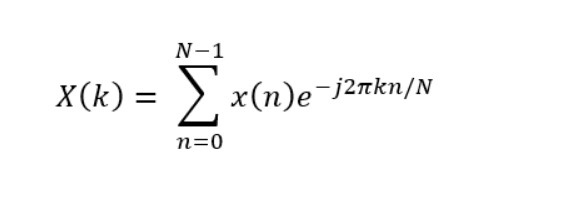


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#using mathematical equation:
x = np.array(input("Enter the sequence:").split(",")).astype(int)

k = len(x)

#output array
y = np.zeros(k,dtype = 'complex') #because we need a complex matrix as output

for i in range (k):
  sum = 0
  for m in range (k):
    sum += x[m]*np.exp(complex(-1j)*2*np.pi*i*m*float(1/k))
  y[i] = sum
print("The DFT of the input sequence using Mathematical expression is:\n",y)


Enter the sequence:1,2,3,4,5,6,7,8
The DFT of the input sequence using Mathematical expression is:
 [36.+0.00000000e+00j -4.+9.65685425e+00j -4.+4.00000000e+00j
 -4.+1.65685425e+00j -4.-3.91886976e-15j -4.-1.65685425e+00j
 -4.-4.00000000e+00j -4.-9.65685425e+00j]


In [33]:
#using matrix form
x = np.array(input("Enter the sequence:").split(",")).astype(int)

k = len(x)

#twiddle matrix
twiddle = np.ones(k, dtype = "complex")

for i in range (1,k):
  for j in range (k):
    num = np.exp(complex(-1j)*2*np.pi*i*j*float(1/k))
    twiddle = np.append(twiddle,num)

twiddle.shape = (k,k)

print("The DFT of the input sequence using twiddle matrix is:\n", np.dot(twiddle,x))





Enter the sequence:1,2,3,4,5,6,7,8
The DFT of the input sequence using twiddle matrix is:
 [36.+0.00000000e+00j -4.+9.65685425e+00j -4.+4.00000000e+00j
 -4.+1.65685425e+00j -4.-3.91886976e-15j -4.-1.65685425e+00j
 -4.-4.00000000e+00j -4.-9.65685425e+00j]
